<a href="https://colab.research.google.com/github/nanangyudi/2020pds_b/blob/main/ProyekAkhirPDS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **DESKRIPSI**
**PREDIKSI GAGAL JANTUNG**

Gagal jantung adalah kejadian umum yang disebabkan oleh CVD dan kumpulan data ini berisi 12 fitur yang dapat digunakan untuk memprediksi kematian akibat gagal jantung.

Penyakit kardiovaskular (CVD) adalah penyebab kematian nomor 1 secara global, merenggut sekitar 17,9 juta jiwa setiap tahun, yang merupakan 31% dari semua kematian di seluruh dunia.Sebagian besar penyakit kardiovaskular dapat dicegah dengan mengatasi faktor risiko perilaku seperti penggunaan tembakau, pola makan tidak sehat dan obesitas, ketidakaktifan fisik, dan penggunaan alkohol yang berbahaya dengan menggunakan strategi di seluruh populasi.

Orang dengan penyakit kardiovaskular atau yang memiliki risiko kardiovaskular tinggi (karena adanya satu atau beberapa faktor risiko seperti hipertensi, diabetes, hiperlipidemia, atau penyakit yang sudah ada) memerlukan deteksi dan pengelolaan dini di mana model pembelajaran mesin dapat sangat membantu.

# **ANALISA PENDEKATAN**
Predictive Model

Decision Tree Classification

# **PENGUMPULAN DATA**
Dilakukan dengan mengunduh dataset pada kaggle.com lalu upload pada pada github selanjutnya di import ke collab


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt 
import plotly.figure_factory as ff
import plotly.express as px
import seaborn as sns
import plotly.graph_objs as go
import warnings
warnings.filterwarnings("ignore")

In [ ]:
url = 'https://raw.githubusercontent.com/ramadhani7199/ProjekPDS/main/heart_failure_clinical_records_dataset.csv'
dc = pd.read_csv(url)

# **PEMAHAMAN DATA**

In [ ]:
dc.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [ ]:
#Menampilkan jumlah null pada data
print(dc.isnull().sum())

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64


In [ ]:
#Menampilkan info 
dc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [ ]:
#Menampilkan deskripsi data secara jelas(count,mean,std,min,25%,50%,75%,max)
dc.describe(include = 'all')

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [ ]:
features = dc.columns
features


Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

# **EKSPLORASI DATA**

In [ ]:
#Plot Distribusi Umur dan Analisa Umur Pada Status Survival

hist_data =[dc["age"].values]
group_labels = ['age'] 

fig = ff.create_distplot(hist_data, group_labels)
fig.update_layout(title_text='Plot Distribusi Umur') 
fig.show()

surv = dc[dc["DEATH_EVENT"]==0]["age"]
not_surv = dc[dc["DEATH_EVENT"]==1]["age"]
hist_data = [surv,not_surv]
group_labels = ['Survived', 'Not Survived']
fig = ff.create_distplot(hist_data, group_labels, bin_size=0.5)
fig.update_layout(
    title_text="Analisis Umur Pada Status Survival")
fig.show()

In [ ]:
# Gender
fig = px.box(dc, x='sex', y='age', points="all")
fig.update_layout(
    title_text="Berdasarkan Gender Penyebaran Usia - Pria = 1 Wanita = 0")
fig.show()

male = dc[dc["sex"]==1]
female = dc[dc["sex"]==0]

male_survi = male[dc["DEATH_EVENT"]==0]
male_not = male[dc["DEATH_EVENT"]==1]
female_survi = female[dc["DEATH_EVENT"]==0]
female_not = female[dc["DEATH_EVENT"]==1]

labels = ['Male - Survived','Male - Not Survived', "Female -  Survived", "Female - Not Survived"]
values = [len(male[dc["DEATH_EVENT"]==0]),len(male[dc["DEATH_EVENT"]==1]),
         len(female[dc["DEATH_EVENT"]==0]),len(female[dc["DEATH_EVENT"]==1])]
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.4)])
fig.update_layout(
    title_text="Analisis Survival - Gender")
fig.show()

['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking']


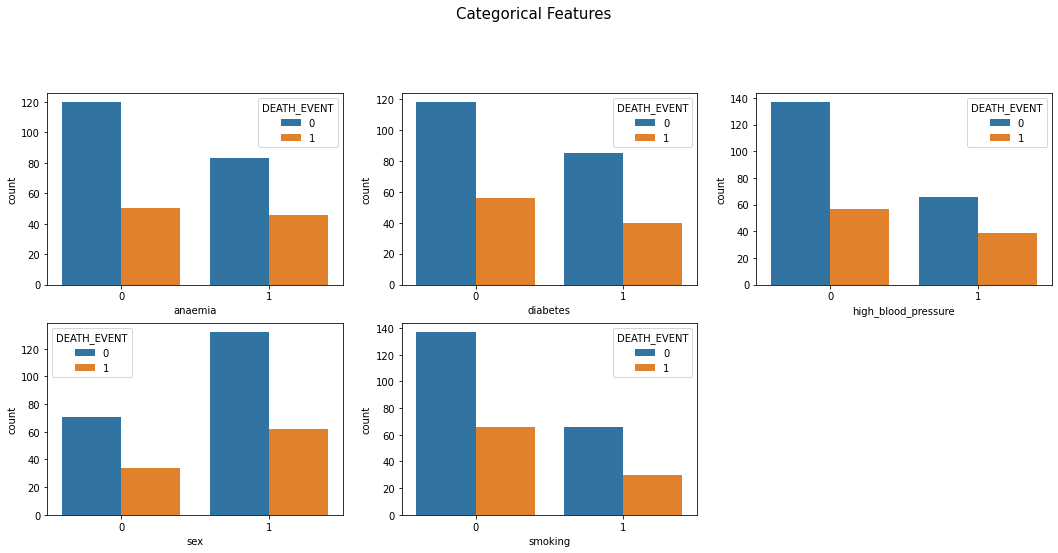

In [ ]:
categorical_features = [feature for feature in features if len(dc[feature].unique())<10]
categorical_features = [feature for feature in categorical_features if feature != 'DEATH_EVENT']
print(categorical_features)
plt.figure(figsize=(18,12))
plt.suptitle('Categorical Features', fontsize=15)
for i in range(0, dc[categorical_features].shape[1]):
    plt.subplot(3, 3, i+1)

    sns.countplot(dc[categorical_features].iloc[:, i], hue=dc['DEATH_EVENT'])

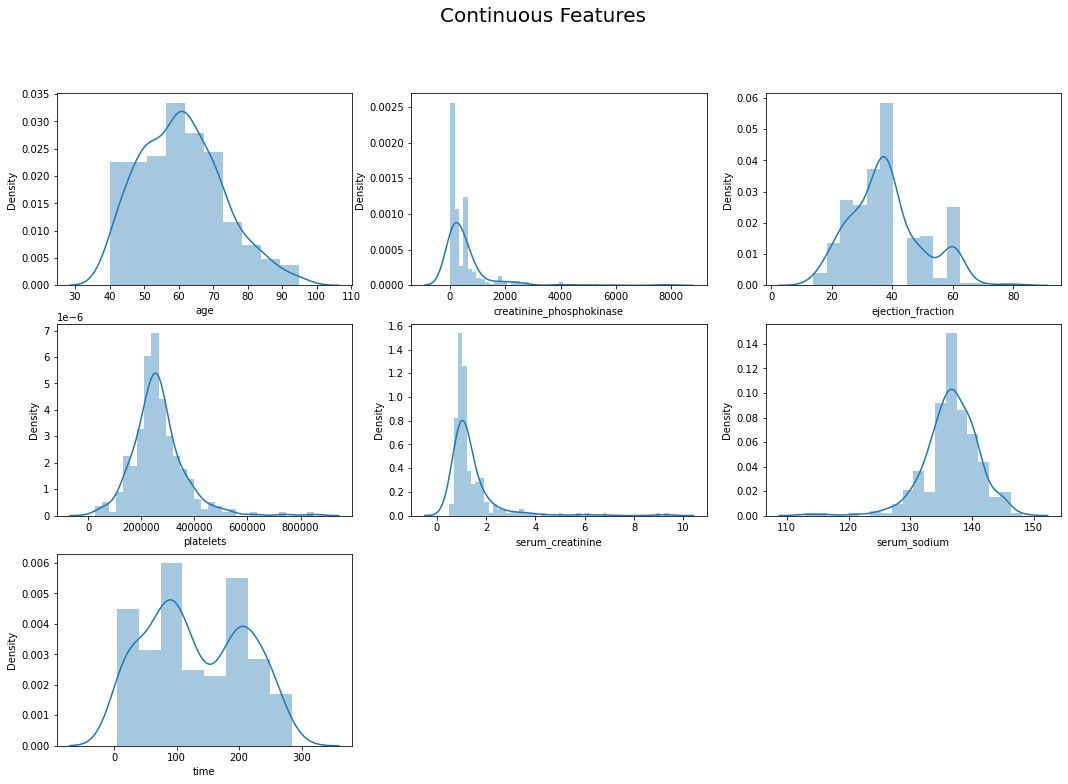

In [ ]:
continuous_features = dc.drop(categorical_features, axis=1).columns
continuous_features = [feature for feature in continuous_features if feature != 'DEATH_EVENT']
plt.figure(figsize=(18,12))
plt.suptitle('Continuous Features', fontsize=20)
for i in range(0, dc[continuous_features].shape[1]):
    plt.subplot(3, 3, i+1)

    sns.distplot(dc[continuous_features].iloc[:, i])


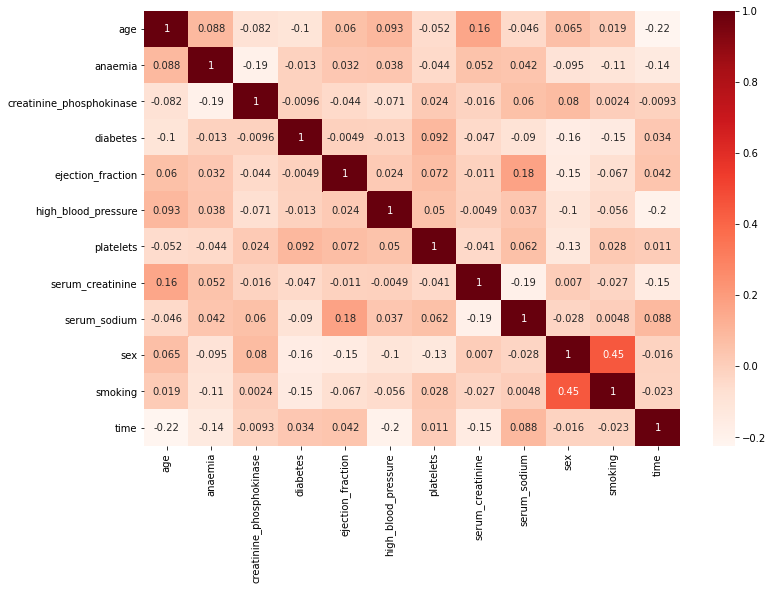

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(dc.drop(columns=['DEATH_EVENT']).corr(), annot=True, cmap="Reds")
plt.show()

# **MODEL**
Menggunakan predictive model dengan decision tree

In [ ]:
from sklearn.model_selection import train_test_split

X = dc.drop('DEATH_EVENT', axis=1)
y = dc['DEATH_EVENT']

train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.20, random_state=1)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,accuracy_score,average_precision_score,balanced_accuracy_score,precision_score

#max_dp = [4,6,8] works best on 6
dt = DecisionTreeClassifier(criterion='entropy', max_depth=6)
dt.fit(train_X, train_y)
pred = dt.predict(test_X)

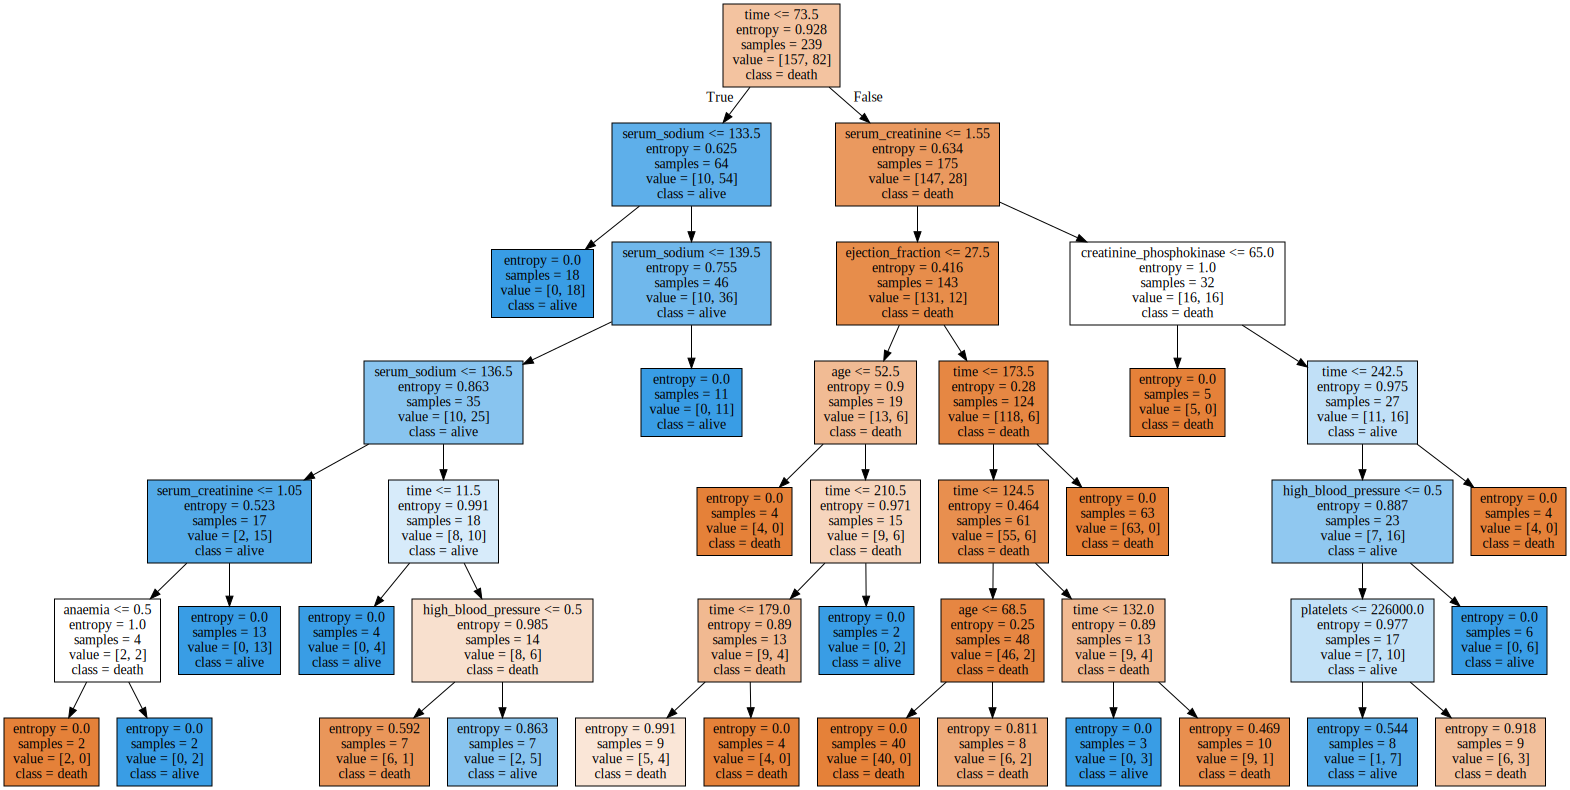

<Figure size 3600x3600 with 0 Axes>

In [ ]:
from sklearn import tree
from sklearn.metrics import confusion_matrix, accuracy_score
from mlxtend.plotting import plot_confusion_matrix
import graphviz

plt.figure(figsize=(50, 50))
filename ='dt.png'

featureNames = dc.columns[:-1]
targetNames = ['death', 'alive']

dot_data = tree.export_graphviz(dt, feature_names=featureNames, class_names=targetNames,filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph


# **EVALUASI MODEL**
Pada Proyek Prediksi Gagal Jantung ini menggunakan model predictive dengan decision tree, nilai akurasi pada decision tree diperoleh sebanyak 86,67% maka dapat dikatakan memiliki nilai akurasi yang baik.

In [ ]:
# Decision Tree Classifier

dt_clf = DecisionTreeClassifier(max_leaf_nodes=3, random_state=0, criterion='entropy')
dt_clf.fit(train_X, train_y)
dt_pred = dt_clf.predict(test_X)
dt_acc = accuracy_score(test_y, dt_pred)
accuracy_list = []
accuracy_list.append(100*dt_acc)

In [ ]:
print("Accuracy of Decision Tree Classifier is : ", "{:.2f}%".format(100* dt_acc))

Accuracy of Decision Tree Classifier is :  86.67%


<Figure size 432x288 with 0 Axes>

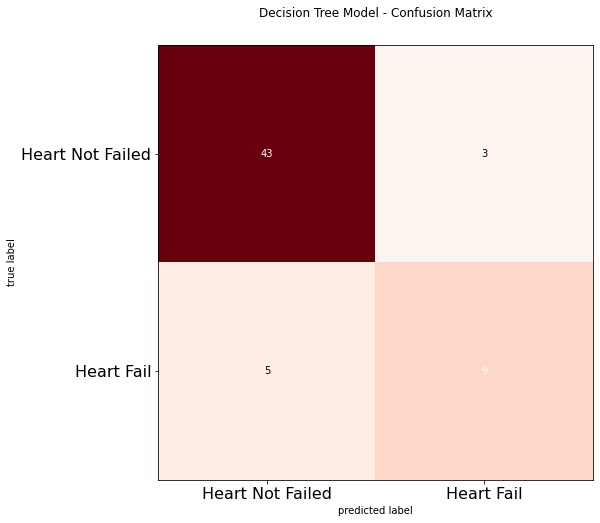

In [ ]:
cm = confusion_matrix(test_y, dt_pred)
plt.figure()
plot_confusion_matrix(cm, figsize=(12,8), hide_ticks=True, cmap=plt.cm.Reds)
plt.title("Decision Tree Model - Confusion Matrix")
plt.xticks(range(2), ["Heart Not Failed","Heart Fail"], fontsize=16)
plt.yticks(range(2), ["Heart Not Failed","Heart Fail"], fontsize=16)
plt.show()